<a href="https://colab.research.google.com/github/Rokuske/Data/blob/main/Time_S.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Начальная работа сданными

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import statsmodels.api as sm
from statsmodels.iolib.table import SimpleTable
from sklearn.metrics import r2_score

In [ ]:
#Подключаемся к гугл диску
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/ML Studies/Газпром/tradesMOEX (1).csv' ,delimiter=';')

In [ ]:
df

,TRADENO,TRADETIME,BOARDID,SECID,PRICE,QUANTITY,VALUE,PERIOD,TRADETIME_GRP,SYSTIME,BUYSELL,DECIMALS,TRADINGSESSION
0,4037738619,9:59:51,TQBR,MOEX,176.11,1,1761.1,S,959,16.06.2021,S,2,1
1,4037738620,9:59:51,TQBR,MOEX,176.11,1,1761.1,S,959,16.06.2021,S,2,1
2,4037738621,9:59:51,TQBR,MOEX,176.11,5,8805.5,S,959,16.06.2021,S,2,1
3,4037738622,9:59:51,TQBR,MOEX,176.11,4,7044.4,S,959,16.06.2021,S,2,1
4,4037738623,9:59:51,TQBR,MOEX,176.11,59,103904.9,S,959,16.06.2021,S,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5047,4037919579,10:33:06,TQBR,MOEX,177.02,25,44255.0,N,1033,16.06.2021,S,2,1
5048,4037919580,10:33:06,TQBR,MOEX,177.02,1,1770.2,N,1033,16.06.2021,S,2,1
5049,4037919604,10:33:07,TQBR,MOEX,176.99,1,1769.9,N,1033,16.06.2021,S,2,1
5050,4037919605,10:33:07,TQBR,MOEX,176.99,3,5309.7,N,1033,16.06.2021,S,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5052 entries, 0 to 5051
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   TRADENO         5052 non-null   int64  
 1   TRADETIME       5052 non-null   object 
 2   BOARDID         5052 non-null   object 
 3   SECID           5052 non-null   object 
 4   PRICE           5052 non-null   float64
 5   QUANTITY        5052 non-null   int64  
 6   VALUE           5052 non-null   float64
 7   PERIOD          5052 non-null   object 
 8   TRADETIME_GRP   5052 non-null   int64  
 9   SYSTIME         5052 non-null   object 
 10  BUYSELL         5052 non-null   object 
 11  DECIMALS        5052 non-null   int64  
 12  TRADINGSESSION  5052 non-null   int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 513.2+ KB


In [ ]:
df['BOARDID'].unique()

array(['TQBR', 'SMAL'], dtype=object)

In [ ]:
df['SECID'].unique()

array(['MOEX'], dtype=object)

In [ ]:
df['PERIOD'].unique()

array(['S', 'N'], dtype=object)

In [ ]:
df['BUYSELL'].unique()

array(['S', 'B'], dtype=object)

In [ ]:
#Цифровизация данных
df['BOARDID'].mask(df['BOARDID'] == 'TQBR', 1, inplace=True)
df['BOARDID'].mask(df['BOARDID'] == 'SMAL', 2, inplace=True)
df['SECID'].mask(df['SECID'] == 'MOEX', 1, inplace=True)
df['PERIOD'].mask(df['PERIOD'] == 'S', 1, inplace=True)
df['PERIOD'].mask(df['PERIOD'] == 'N', 2, inplace=True)
df['BUYSELL'].mask(df['BUYSELL'] == 'S', 1, inplace=True)
df['BUYSELL'].mask(df['BUYSELL'] == 'B', 2, inplace=True)
df.BOARDID = df.BOARDID.astype(int)
df.SECID = df.SECID.astype(int)
df.PERIOD = df.PERIOD.astype(int)
df.BUYSELL = df.BUYSELL.astype(int)
df

,TRADENO,TRADETIME,BOARDID,SECID,PRICE,QUANTITY,VALUE,PERIOD,TRADETIME_GRP,SYSTIME,BUYSELL,DECIMALS,TRADINGSESSION
0,4037738619,9:59:51,1,1,176.11,1,1761.1,1,959,16.06.2021,1,2,1
1,4037738620,9:59:51,1,1,176.11,1,1761.1,1,959,16.06.2021,1,2,1
2,4037738621,9:59:51,1,1,176.11,5,8805.5,1,959,16.06.2021,1,2,1
3,4037738622,9:59:51,1,1,176.11,4,7044.4,1,959,16.06.2021,1,2,1
4,4037738623,9:59:51,1,1,176.11,59,103904.9,1,959,16.06.2021,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5047,4037919579,10:33:06,1,1,177.02,25,44255.0,2,1033,16.06.2021,1,2,1
5048,4037919580,10:33:06,1,1,177.02,1,1770.2,2,1033,16.06.2021,1,2,1
5049,4037919604,10:33:07,1,1,176.99,1,1769.9,2,1033,16.06.2021,1,2,1
5050,4037919605,10:33:07,1,1,176.99,3,5309.7,2,1033,16.06.2021,1,2,1


In [ ]:
df.insert(1, "Time", 5)
df

,TRADENO,Time,TRADETIME,BOARDID,SECID,PRICE,QUANTITY,VALUE,PERIOD,TRADETIME_GRP,SYSTIME,BUYSELL,DECIMALS,TRADINGSESSION
0,4037738619,5,9:59:51,1,1,176.11,1,1761.1,1,959,16.06.2021,1,2,1
1,4037738620,5,9:59:51,1,1,176.11,1,1761.1,1,959,16.06.2021,1,2,1
2,4037738621,5,9:59:51,1,1,176.11,5,8805.5,1,959,16.06.2021,1,2,1
3,4037738622,5,9:59:51,1,1,176.11,4,7044.4,1,959,16.06.2021,1,2,1
4,4037738623,5,9:59:51,1,1,176.11,59,103904.9,1,959,16.06.2021,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5047,4037919579,5,10:33:06,1,1,177.02,25,44255.0,2,1033,16.06.2021,1,2,1
5048,4037919580,5,10:33:06,1,1,177.02,1,1770.2,2,1033,16.06.2021,1,2,1
5049,4037919604,5,10:33:07,1,1,176.99,1,1769.9,2,1033,16.06.2021,1,2,1
5050,4037919605,5,10:33:07,1,1,176.99,3,5309.7,2,1033,16.06.2021,1,2,1


In [ ]:
df['Time'] = pd.to_datetime(df['SYSTIME'] + ' ' + df['TRADETIME'])
df

,TRADENO,Time,TRADETIME,BOARDID,SECID,PRICE,QUANTITY,VALUE,PERIOD,TRADETIME_GRP,SYSTIME,BUYSELL,DECIMALS,TRADINGSESSION
0,4037738619,2021-06-16 09:59:51,9:59:51,1,1,176.11,1,1761.1,1,959,16.06.2021,1,2,1
1,4037738620,2021-06-16 09:59:51,9:59:51,1,1,176.11,1,1761.1,1,959,16.06.2021,1,2,1
2,4037738621,2021-06-16 09:59:51,9:59:51,1,1,176.11,5,8805.5,1,959,16.06.2021,1,2,1
3,4037738622,2021-06-16 09:59:51,9:59:51,1,1,176.11,4,7044.4,1,959,16.06.2021,1,2,1
4,4037738623,2021-06-16 09:59:51,9:59:51,1,1,176.11,59,103904.9,1,959,16.06.2021,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5047,4037919579,2021-06-16 10:33:06,10:33:06,1,1,177.02,25,44255.0,2,1033,16.06.2021,1,2,1
5048,4037919580,2021-06-16 10:33:06,10:33:06,1,1,177.02,1,1770.2,2,1033,16.06.2021,1,2,1
5049,4037919604,2021-06-16 10:33:07,10:33:07,1,1,176.99,1,1769.9,2,1033,16.06.2021,1,2,1
5050,4037919605,2021-06-16 10:33:07,10:33:07,1,1,176.99,3,5309.7,2,1033,16.06.2021,1,2,1


In [ ]:
df.insert(1, "Roll", 5)

In [ ]:
df.insert(1, "Target", 0)

In [ ]:
df.insert(1, "Roll", 0)
df.insert(1, "Dev", 0)

# Предварительные шаги (Путь того как было подобранно окончательное рение)

In [ ]:
df1 = df[["Time", "PRICE"]]
# превратим дату в индекс и сделаем изменение постоянным
df1.set_index('Time', inplace = True)

In [ ]:
df3 = df[["Time", "VALUE"]]
# превратим дату в индекс и сделаем изменение постоянным
df3.set_index('Time', inplace = True)

[Text(0.5, 1.0, 'Изменение цен'), Text(0.5, 0, 'Дата'), Text(0, 0.5, 'Цена')]

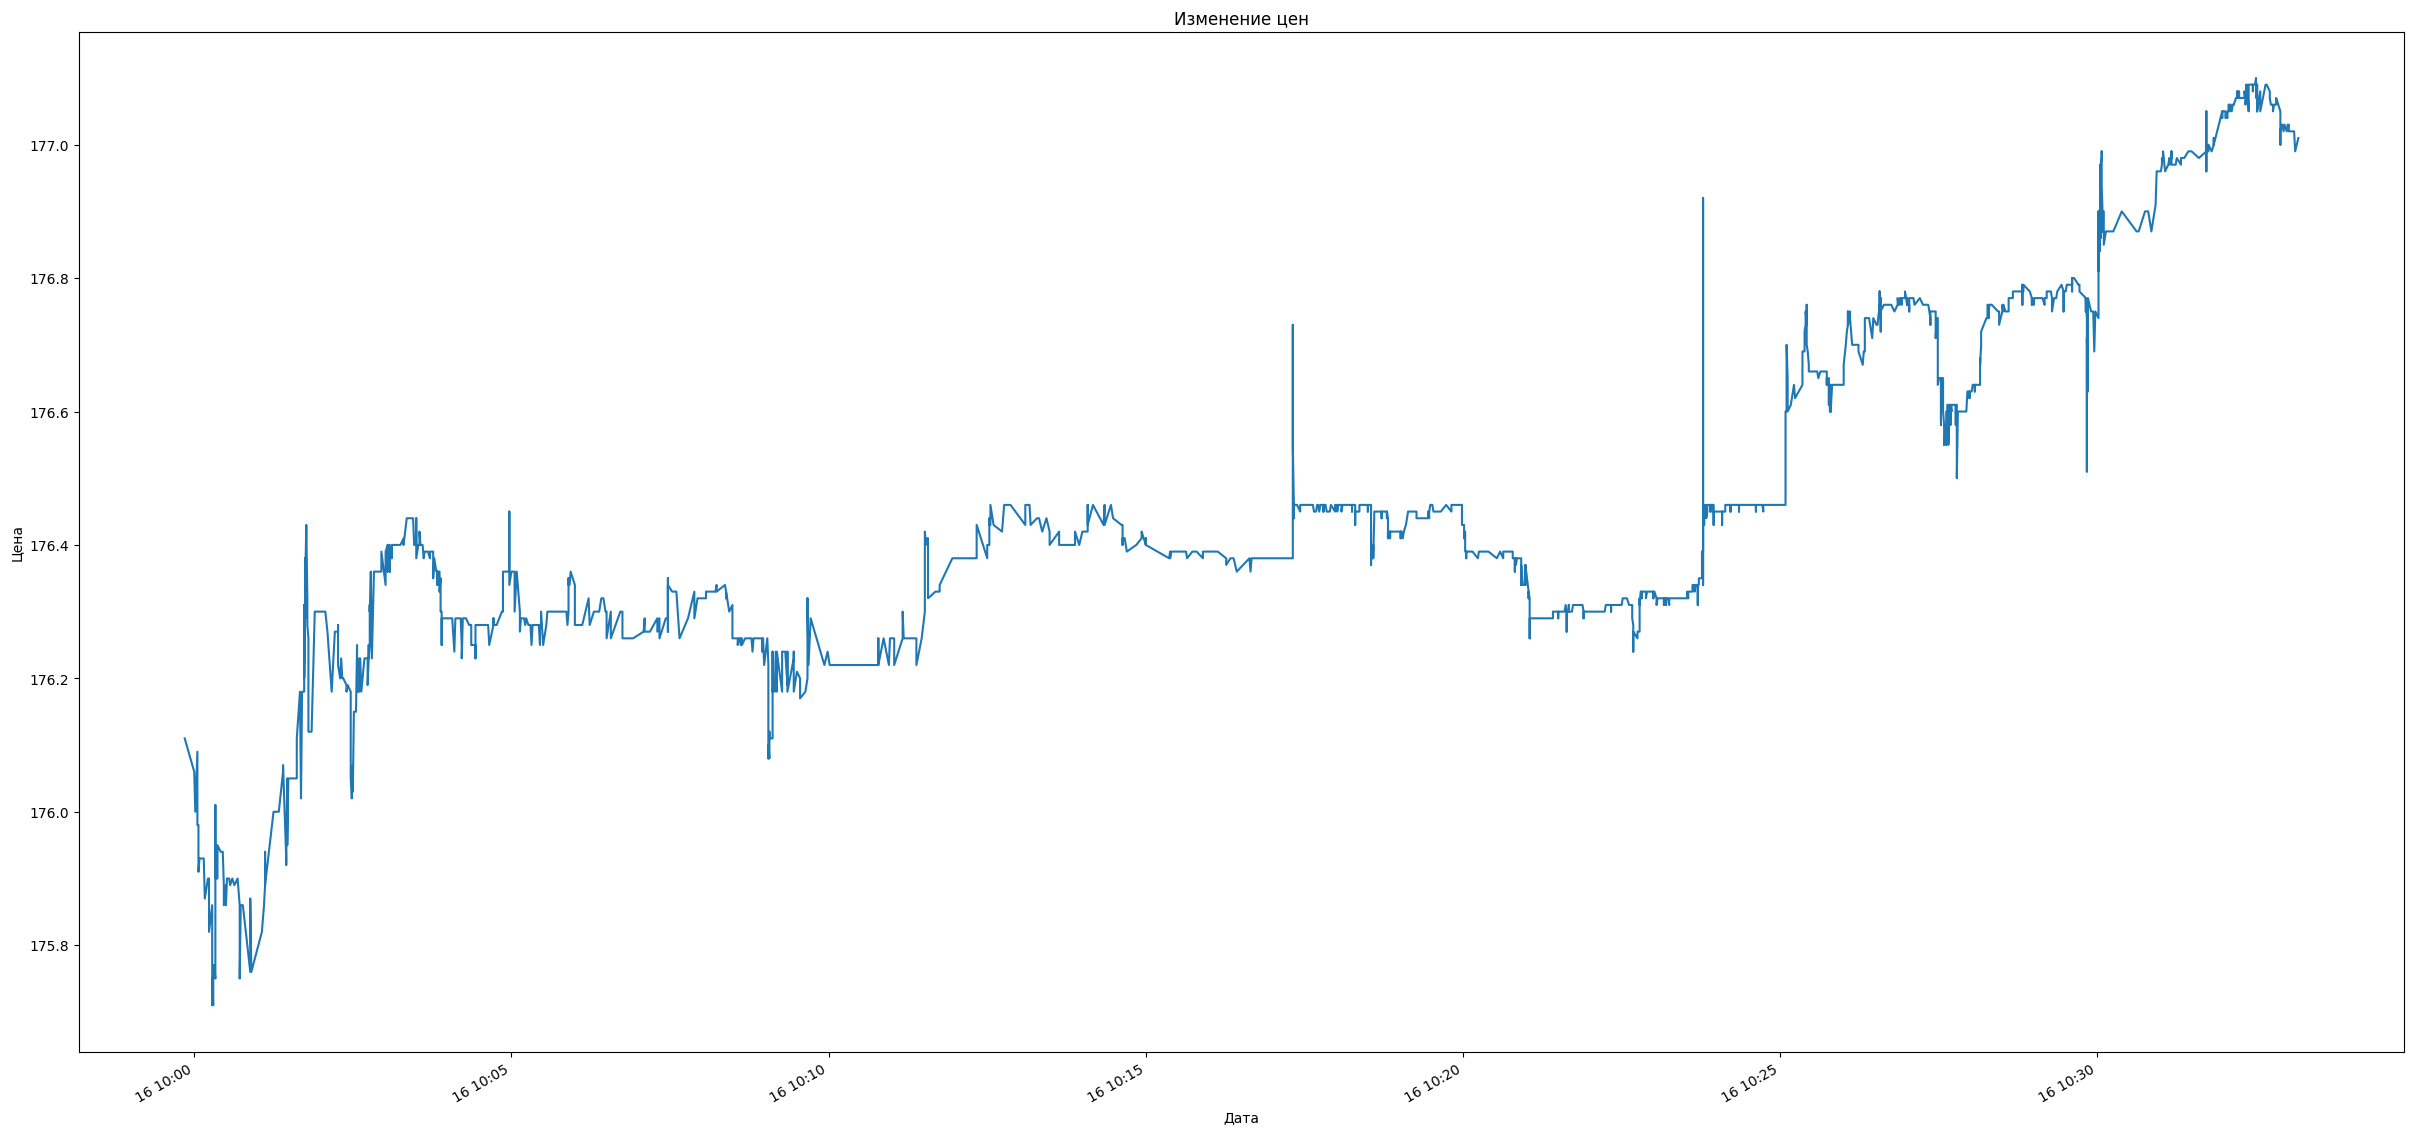

In [ ]:
# изменим размер графика, уберем легенду и добавим подписи
ax = df1.plot(figsize = (30,15), legend = None)
ax.set(title = 'Изменение цен', xlabel = 'Дата', ylabel = 'Цена')


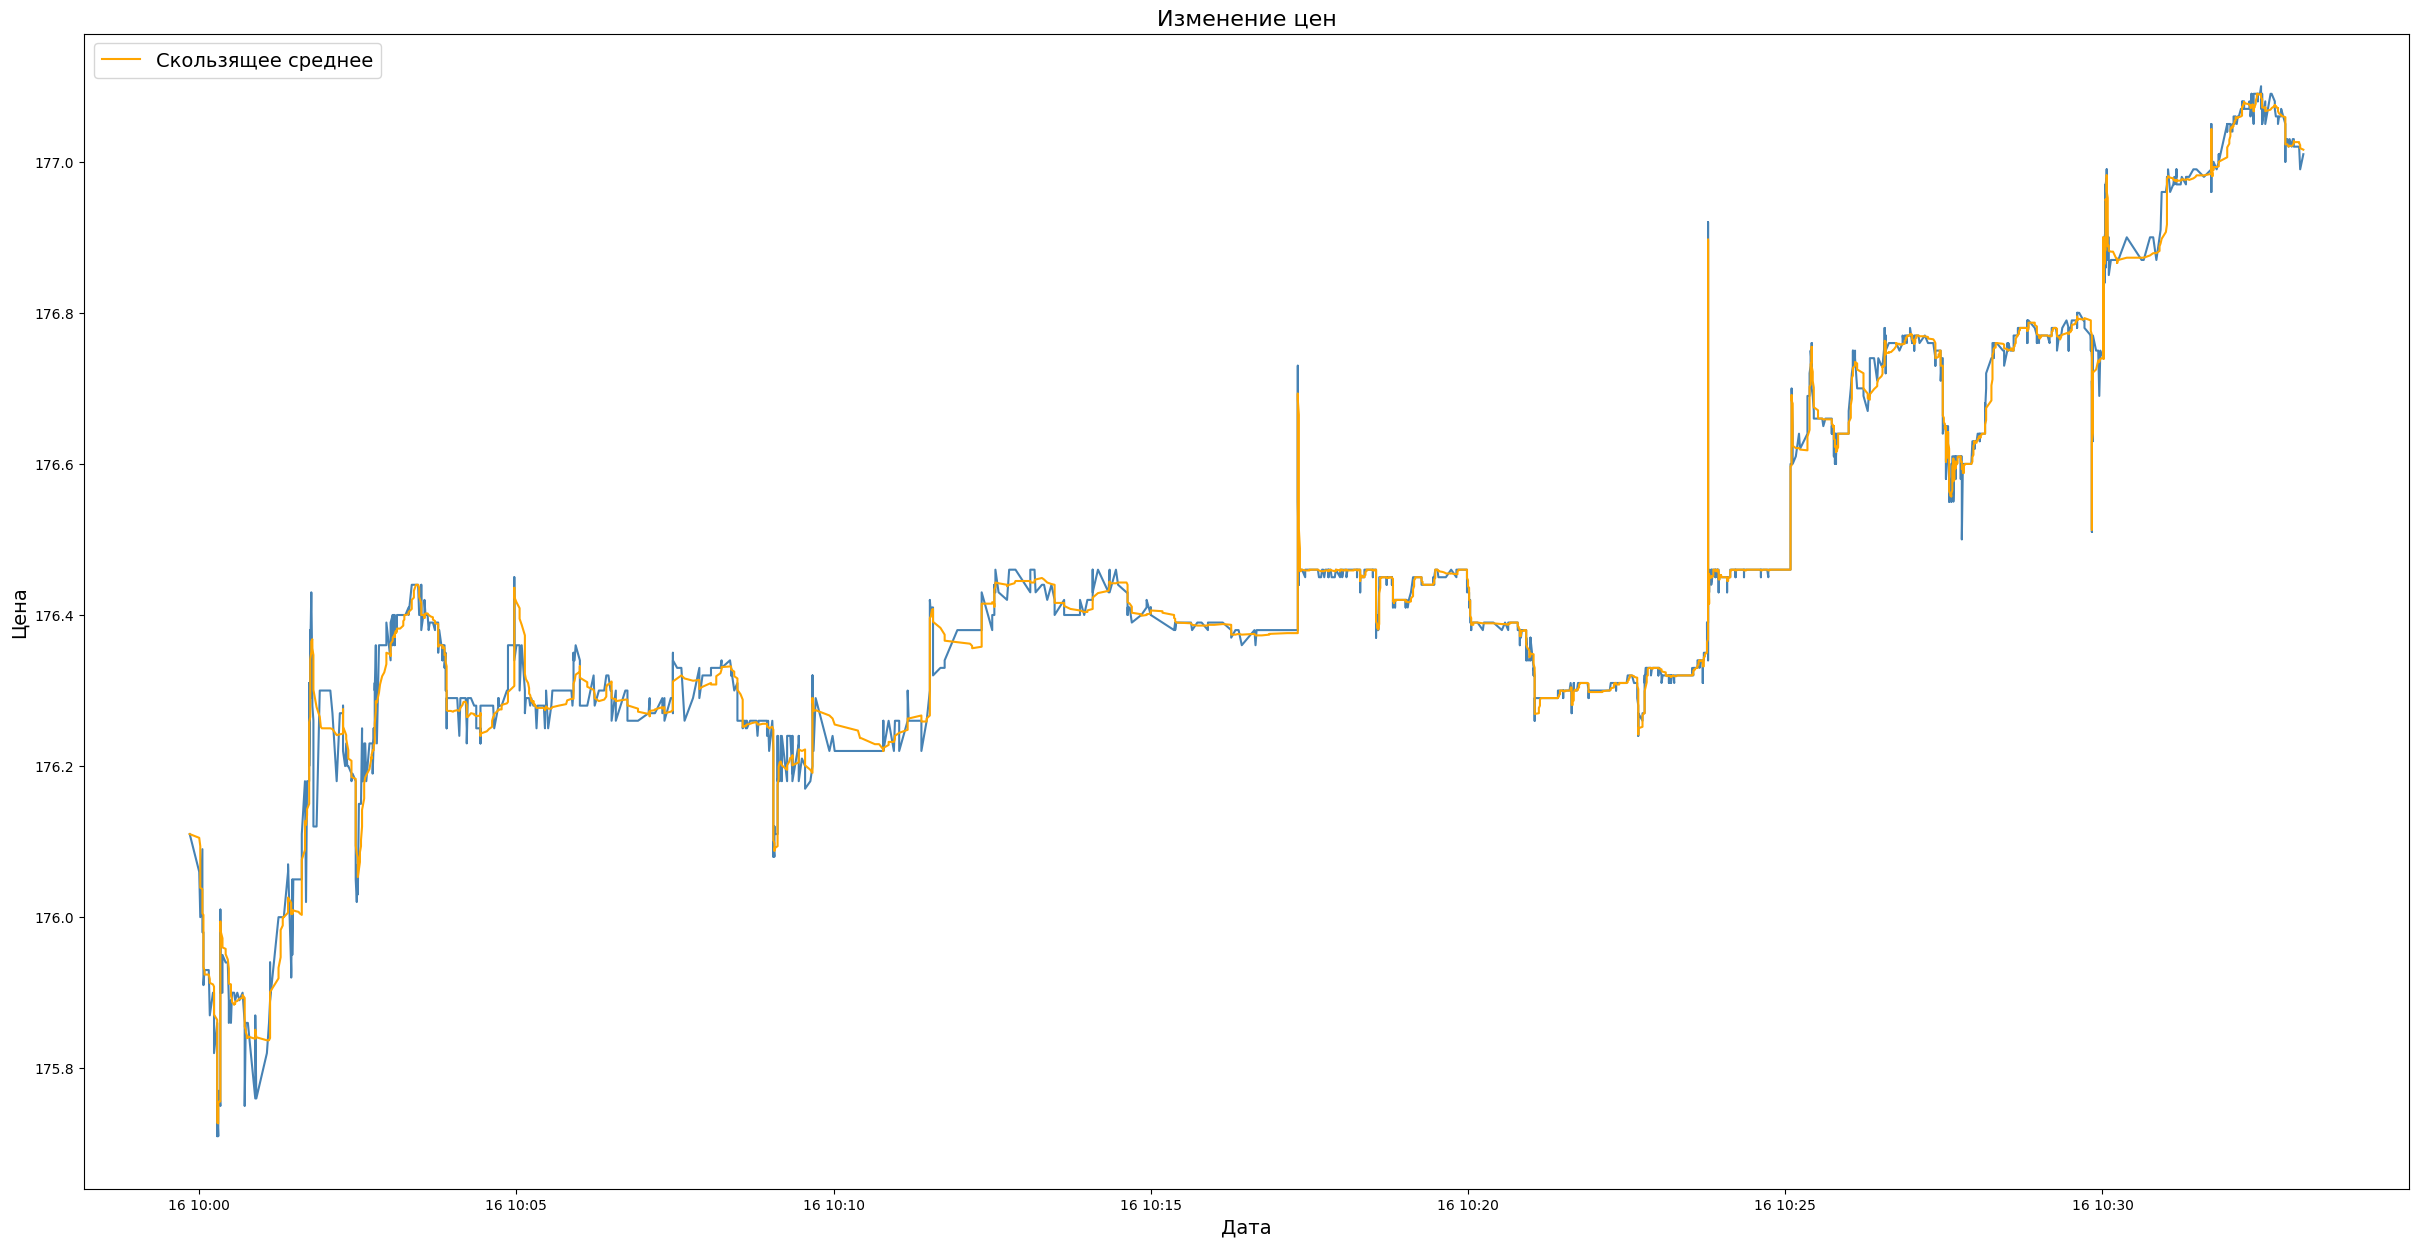

In [ ]:
# зададим размер графика
plt.figure(figsize = (30,15))

# поочередно зададим кривые (перевозки и скользящее среднее) с подписями и цветом
plt.plot(df1, color = 'steelblue')
plt.plot(df1.rolling(window = 10).mean(), label = 'Скользящее среднее', color = 'orange')

# добавим легенду, ее положение на графике и размер шрифта
plt.legend(title = '', loc = 'upper left', fontsize = 14)

# добавим подписи к осям и заголовки
plt.xlabel('Дата', fontsize = 14)
plt.ylabel('Цена', fontsize = 14)
plt.title('Изменение цен', fontsize = 16)

# выведем обе кривые на одном графике
plt.show()

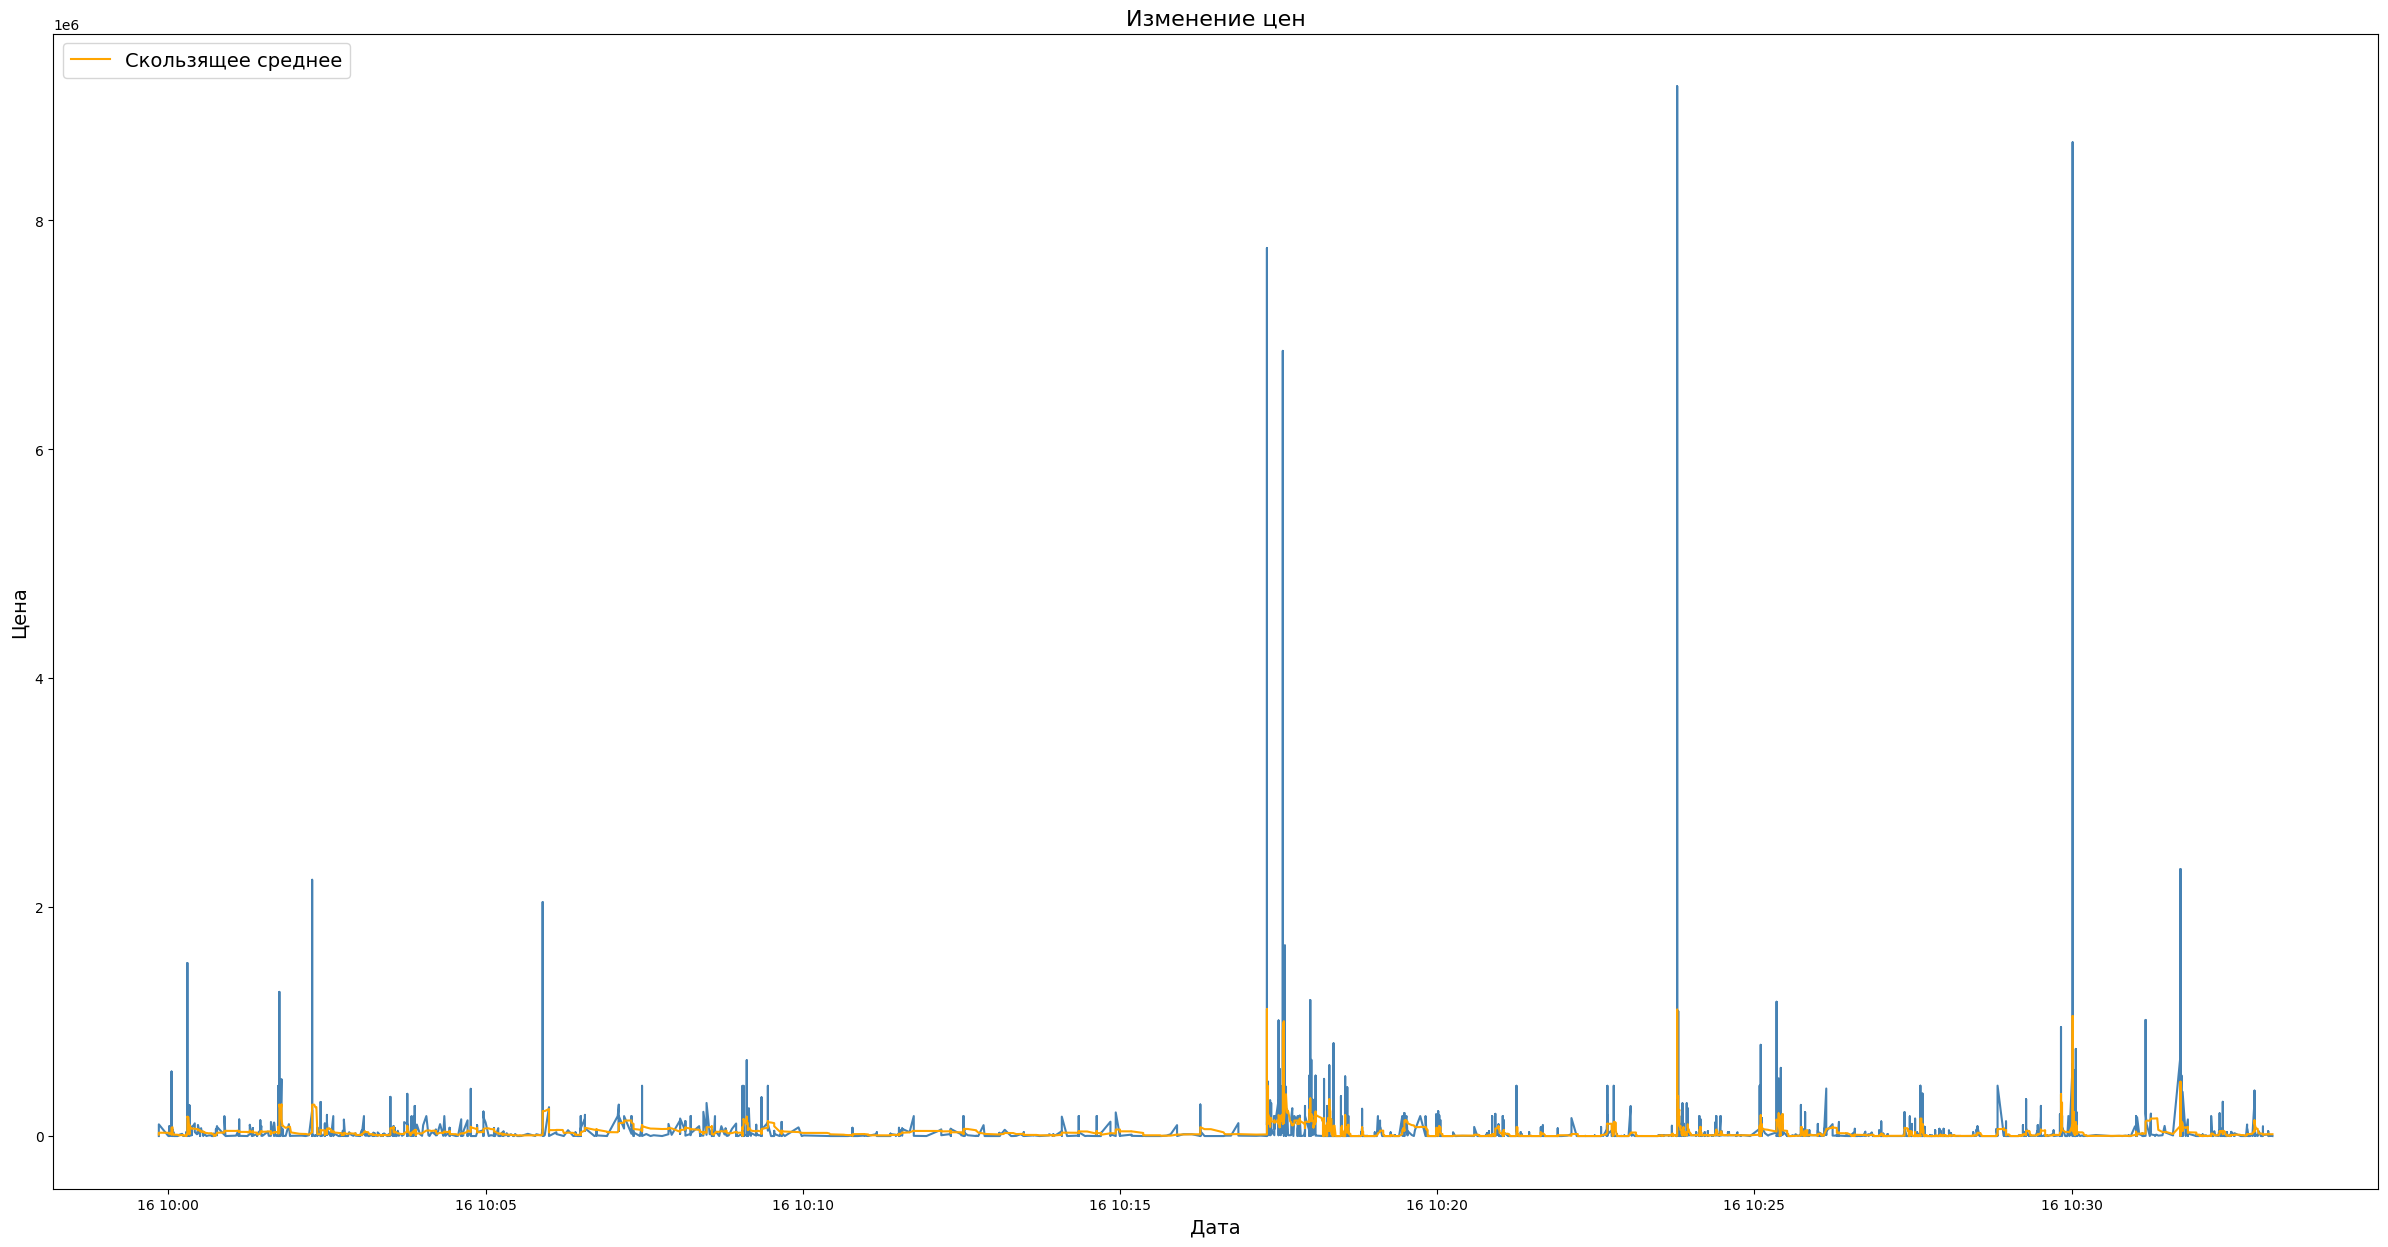

In [ ]:
# зададим размер графика
plt.figure(figsize = (30,15))

# поочередно зададим кривые (перевозки и скользящее среднее) с подписями и цветом
plt.plot(df3, color = 'steelblue')
plt.plot(df3.rolling(window = 10).mean(), label = 'Скользящее среднее', color = 'orange')

# добавим легенду, ее положение на графике и размер шрифта
plt.legend(title = '', loc = 'upper left', fontsize = 14)

# добавим подписи к осям и заголовки
plt.xlabel('Дата', fontsize = 14)
plt.ylabel('Цена', fontsize = 14)
plt.title('Изменение цен', fontsize = 16)

# выведем обе кривые на одном графике
plt.show()

In [ ]:
df2 = df

In [ ]:
df2

,TRADENO,Roll,Time,TRADETIME,BOARDID,SECID,PRICE,QUANTITY,VALUE,PERIOD,TRADETIME_GRP,SYSTIME,BUYSELL,DECIMALS,TRADINGSESSION
0,4037738619,5,2021-06-16 09:59:51,9:59:51,1,1,176.11,1,1761.1,1,959,16.06.2021,1,2,1
1,4037738620,5,2021-06-16 09:59:51,9:59:51,1,1,176.11,1,1761.1,1,959,16.06.2021,1,2,1
2,4037738621,5,2021-06-16 09:59:51,9:59:51,1,1,176.11,5,8805.5,1,959,16.06.2021,1,2,1
3,4037738622,5,2021-06-16 09:59:51,9:59:51,1,1,176.11,4,7044.4,1,959,16.06.2021,1,2,1
4,4037738623,5,2021-06-16 09:59:51,9:59:51,1,1,176.11,59,103904.9,1,959,16.06.2021,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5047,4037919579,5,2021-06-16 10:33:06,10:33:06,1,1,177.02,25,44255.0,2,1033,16.06.2021,1,2,1
5048,4037919580,5,2021-06-16 10:33:06,10:33:06,1,1,177.02,1,1770.2,2,1033,16.06.2021,1,2,1
5049,4037919604,5,2021-06-16 10:33:07,10:33:07,1,1,176.99,1,1769.9,2,1033,16.06.2021,1,2,1
5050,4037919605,5,2021-06-16 10:33:07,10:33:07,1,1,176.99,3,5309.7,2,1033,16.06.2021,1,2,1


In [ ]:
df2.set_index('Time', inplace = True)
df2

,TRADENO,Roll,TRADETIME,BOARDID,SECID,PRICE,QUANTITY,VALUE,PERIOD,TRADETIME_GRP,SYSTIME,BUYSELL,DECIMALS,TRADINGSESSION
Time,,,,,,,,,,,,,,
2021-06-16 09:59:51,4037738619,5,9:59:51,1,1,176.11,1,1761.1,1,959,16.06.2021,1,2,1
2021-06-16 09:59:51,4037738620,5,9:59:51,1,1,176.11,1,1761.1,1,959,16.06.2021,1,2,1
2021-06-16 09:59:51,4037738621,5,9:59:51,1,1,176.11,5,8805.5,1,959,16.06.2021,1,2,1
2021-06-16 09:59:51,4037738622,5,9:59:51,1,1,176.11,4,7044.4,1,959,16.06.2021,1,2,1
2021-06-16 09:59:51,4037738623,5,9:59:51,1,1,176.11,59,103904.9,1,959,16.06.2021,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-16 10:33:06,4037919579,5,10:33:06,1,1,177.02,25,44255.0,2,1033,16.06.2021,1,2,1
2021-06-16 10:33:06,4037919580,5,10:33:06,1,1,177.02,1,1770.2,2,1033,16.06.2021,1,2,1
2021-06-16 10:33:07,4037919604,5,10:33:07,1,1,176.99,1,1769.9,2,1033,16.06.2021,1,2,1


In [ ]:
df2.insert(1, "Dev", 5)

In [ ]:
rolling_mean = df2['PRICE'].rolling(10).mean()
df2['Roll'] = rolling_mean

# определение мошеннических сделок
threshold = 0.1  # пороговое значение отклонения цены
df2['Dev'] = (df2['PRICE'] - df2['Roll']) / df2['Roll']
#Если отклонение больше 10% в любую сторону
df_bad = df2.loc[df2['Dev'].abs() >= threshold]

# вывод мошеннических сделок
df_bad

,TRADENO,Dev,Roll,TRADETIME,BOARDID,SECID,PRICE,QUANTITY,VALUE,PERIOD,TRADETIME_GRP,SYSTIME,BUYSELL,DECIMALS,TRADINGSESSION
Time,,,,,,,,,,,,,,,


In [ ]:
df4

,TRADENO,Dev,Roll,TRADETIME,BOARDID,SECID,PRICE,QUANTITY,VALUE,PERIOD,TRADETIME_GRP,SYSTIME,BUYSELL,DECIMALS,TRADINGSESSION
Time,,,,,,,,,,,,,,,
2021-06-16 09:59:51,4037738619,NaN,NaN,9:59:51,1,1,176.11,1,1761.1,1,959,16.06.2021,1,2,1
2021-06-16 09:59:51,4037738620,NaN,NaN,9:59:51,1,1,176.11,1,1761.1,1,959,16.06.2021,1,2,1
2021-06-16 09:59:51,4037738621,NaN,NaN,9:59:51,1,1,176.11,5,8805.5,1,959,16.06.2021,1,2,1
2021-06-16 09:59:51,4037738622,NaN,NaN,9:59:51,1,1,176.11,4,7044.4,1,959,16.06.2021,1,2,1
2021-06-16 09:59:51,4037738623,NaN,NaN,9:59:51,1,1,176.11,59,103904.9,1,959,16.06.2021,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-16 10:33:06,4037919579,-0.000034,177.026,10:33:06,1,1,177.02,25,44255.0,2,1033,16.06.2021,1,2,1
2021-06-16 10:33:06,4037919580,-0.000028,177.025,10:33:06,1,1,177.02,1,1770.2,2,1033,16.06.2021,1,2,1
2021-06-16 10:33:07,4037919604,-0.000181,177.022,10:33:07,1,1,176.99,1,1769.9,2,1033,16.06.2021,1,2,1


In [ ]:
df4 = df

rolling_mean = df4['VALUE'].rolling(10).mean()
df4['Roll'] = rolling_mean

# определение мошеннических сделок
threshold = 0.9  # пороговое значение отклонения цены
df4['Dev'] = (df4['VALUE'] - df4['Roll']) / df4['Roll']
#Если отклонение больше 10% в любую сторону
df_bad = df4.loc[df4['Dev'].abs() >= threshold]

# вывод мошеннических сделок
df_bad

,TRADENO,Dev,Roll,TRADETIME,BOARDID,SECID,PRICE,QUANTITY,VALUE,PERIOD,TRADETIME_GRP,SYSTIME,BUYSELL,DECIMALS,TRADINGSESSION
Time,,,,,,,,,,,,,,,
2021-06-16 09:59:51,4037738631,2.371429,30819.25,9:59:51,1,1,176.11,59,103904.9,1,959,16.06.2021,2,2,1
2021-06-16 10:00:00,4037739720,-0.941877,30290.87,10:00:00,1,1,176.06,1,1760.6,2,1000,16.06.2021,1,2,1
2021-06-16 10:00:01,4037740084,-0.912335,20076.38,10:00:01,1,1,176.00,1,1760.0,2,1000,16.06.2021,1,2,1
2021-06-16 10:00:01,4037740086,-0.907462,19019.17,10:00:01,1,1,176.00,1,1760.0,2,1000,16.06.2021,1,2,1
2021-06-16 10:00:01,4037740088,2.047648,28874.73,10:00:01,1,1,176.00,50,88000.0,2,1000,16.06.2021,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-16 10:33:01,4037919228,-0.918696,21773.81,10:33:01,1,1,177.03,1,1770.3,2,1033,16.06.2021,2,2,1
2021-06-16 10:33:01,4037919229,-0.900986,17879.38,10:33:01,1,1,177.03,1,1770.3,2,1033,16.06.2021,2,2,1
2021-06-16 10:33:01,4037919230,4.517252,15401.58,10:33:01,1,1,177.03,48,84974.4,2,1033,16.06.2021,2,2,1


# Окончательное решение

In [ ]:
rolling_mean = df['VALUE'].rolling(10).mean()
df['Roll'] = rolling_mean

# определение мошеннических сделок
threshold = 0.8  # пороговое значение отклонения цены
df['Dev'] = (df['VALUE'] - df['Roll']) / df['Roll']
#Если отклонение больше 10% в любую сторону
df_bad = df.loc[df['Dev'].abs() >= threshold]

# вывод мошеннических сделок
df_bad

,TRADENO,Dev,Roll,Target,Time,TRADETIME,BOARDID,SECID,PRICE,QUANTITY,VALUE,PERIOD,TRADETIME_GRP,SYSTIME,BUYSELL,DECIMALS,TRADINGSESSION,Tagret
9,4037738628,-0.883721,15145.46,1,2021-06-16 09:59:51,9:59:51,1,1,176.11,1,1761.1,1,959,16.06.2021,1,2,1,0
12,4037738631,2.371429,30819.25,1,2021-06-16 09:59:51,9:59:51,1,1,176.11,59,103904.9,1,959,16.06.2021,2,2,1,0
13,4037739720,-0.941877,30290.87,1,2021-06-16 10:00:00,10:00:00,1,1,176.06,1,1760.6,2,1000,16.06.2021,1,2,1,0
14,4037740084,-0.912335,20076.38,1,2021-06-16 10:00:01,10:00:01,1,1,176.00,1,1760.0,2,1000,16.06.2021,1,2,1,0
16,4037740086,-0.907462,19019.17,1,2021-06-16 10:00:01,10:00:01,1,1,176.00,1,1760.0,2,1000,16.06.2021,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5043,4037919230,4.517252,15401.58,1,2021-06-16 10:33:01,10:33:01,1,1,177.03,48,84974.4,2,1033,16.06.2021,2,2,1,0
5047,4037919579,1.049103,21597.25,1,2021-06-16 10:33:06,10:33:06,1,1,177.02,25,44255.0,2,1033,16.06.2021,1,2,1,0
5048,4037919580,-0.897962,17348.52,1,2021-06-16 10:33:06,10:33:06,1,1,177.02,1,1770.2,2,1033,16.06.2021,1,2,1,0
5049,4037919604,-0.897980,17348.49,1,2021-06-16 10:33:07,10:33:07,1,1,176.99,1,1769.9,2,1033,16.06.2021,1,2,1,0


In [ ]:
df['Target'].mask(df['Dev'].abs() >= 0.8, 1, inplace=True)
df

,TRADENO,Dev,Roll,Target,Time,TRADETIME,BOARDID,SECID,PRICE,QUANTITY,VALUE,PERIOD,TRADETIME_GRP,SYSTIME,BUYSELL,DECIMALS,TRADINGSESSION,Tagret
0,4037738619,NaN,NaN,0,2021-06-16 09:59:51,9:59:51,1,1,176.11,1,1761.1,1,959,16.06.2021,1,2,1,1
1,4037738620,NaN,NaN,0,2021-06-16 09:59:51,9:59:51,1,1,176.11,1,1761.1,1,959,16.06.2021,1,2,1,1
2,4037738621,NaN,NaN,0,2021-06-16 09:59:51,9:59:51,1,1,176.11,5,8805.5,1,959,16.06.2021,1,2,1,1
3,4037738622,NaN,NaN,0,2021-06-16 09:59:51,9:59:51,1,1,176.11,4,7044.4,1,959,16.06.2021,1,2,1,1
4,4037738623,NaN,NaN,0,2021-06-16 09:59:51,9:59:51,1,1,176.11,59,103904.9,1,959,16.06.2021,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5047,4037919579,1.049103,21597.25,1,2021-06-16 10:33:06,10:33:06,1,1,177.02,25,44255.0,2,1033,16.06.2021,1,2,1,0
5048,4037919580,-0.897962,17348.52,1,2021-06-16 10:33:06,10:33:06,1,1,177.02,1,1770.2,2,1033,16.06.2021,1,2,1,0
5049,4037919604,-0.897980,17348.49,1,2021-06-16 10:33:07,10:33:07,1,1,176.99,1,1769.9,2,1033,16.06.2021,1,2,1,0
5050,4037919605,-0.700058,17702.43,0,2021-06-16 10:33:07,10:33:07,1,1,176.99,3,5309.7,2,1033,16.06.2021,1,2,1,1


In [ ]:
df["Target"].value_counts()

0    3127
1    1925
Name: Target, dtype: int64

In [ ]:
k = 0.4 # задаём долю тестовых данных в нашем датасете
mask = (np.random.random(df1.shape[0]) < k) # формируем маску для тестовых данных
X_train = df[~mask][df.columns.drop(['TRADENO', 'Dev', 'Time', 'Roll', 'Target', 'Time', 'TRADETIME', 'SYSTIME'])]
# X - признаки, на основе которых модель будет делать предсказание
y_train = df[~mask]['Target']

# y - целевой признак

X_test = df[mask][df.columns.drop(['TRADENO', 'Dev', 'Time', 'Roll', 'Target', 'Time', 'TRADETIME', 'SYSTIME'])]
y_test = df[mask]['Target']

In [ ]:
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()
log_regression.fit (X_train,y_train)
y_pred= log_regression.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred, normalize=True)

1.0